In [11]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [4]:
start_date = datetime(2021, 1, 1)
end_date = start_date + timedelta(days= 199)
date_range = [start_date + timedelta(days= x) for x in range(200)]
data = {
    'date': date_range,
    'values': np.linspace(0, 50, 200) + np.random.normal(scale= 5, size= 200),
    'column1': [random.choice(['A', 'B', 'C']) for _ in range(200)],
    'column2': np.random.randint(1, 100, size= 200),
    'colum3': np.random.choice(['False', 'True'], size= 200)
}

In [5]:
df = pd.DataFrame(data)
df.head()

,date,values,column1,column2,colum3
0,2021-01-01,6.312326,B,3,True
1,2021-01-02,-3.394640,B,49,True
2,2021-01-03,-1.966303,A,77,True
3,2021-01-04,2.270520,A,10,False
4,2021-01-05,1.831349,C,38,False


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
result = seasonal_decompose(df['values'], model='additive', period=10)

In [8]:
result.trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN
Name: trend, Length: 200, dtype: float64

In [9]:
result.seasonal

0     -1.373612
1     -1.678079
2      1.588116
3     -0.204449
4      0.176525
         ...   
195    0.492682
196    1.602884
197   -1.254880
198    1.837592
199   -1.186779
Name: seasonal, Length: 200, dtype: float64

In [10]:
result.resid

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN
Name: resid, Length: 200, dtype: float64

In [12]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

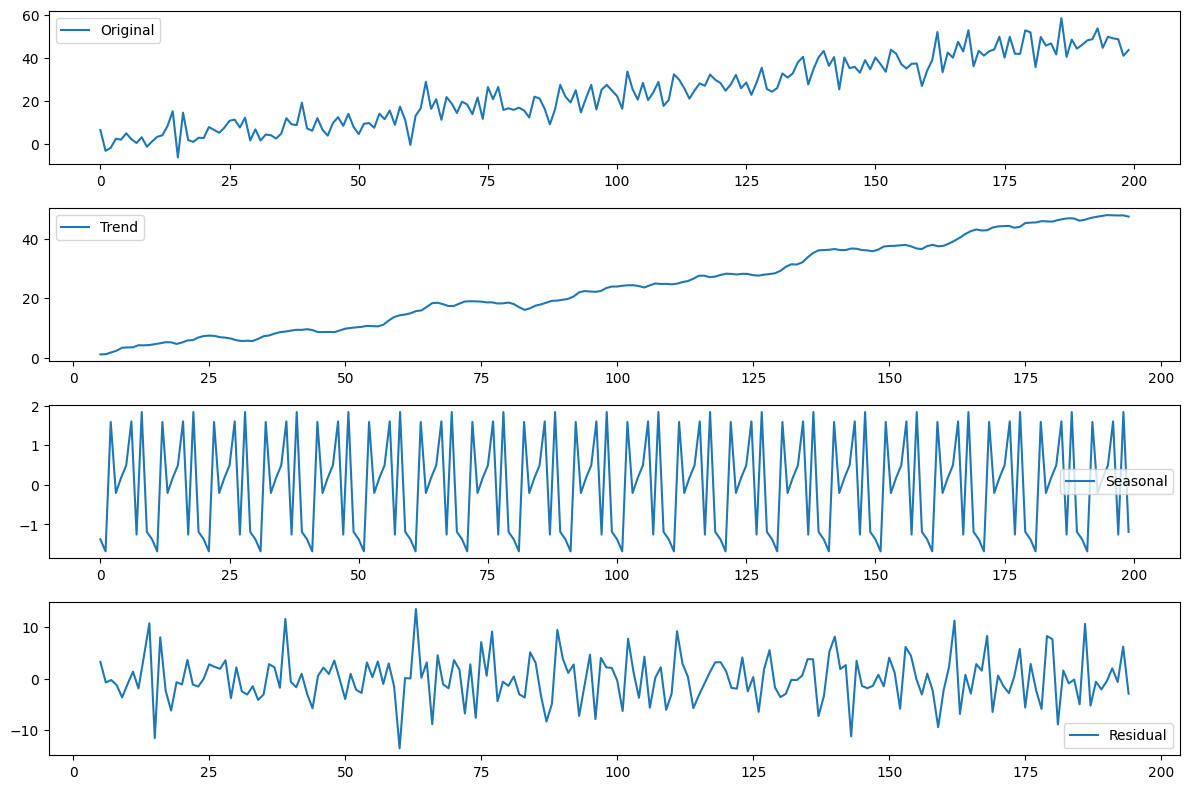

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['values'], label= 'Original')
plt.legend()

plt.subplot(412)
plt.plot(trend , label= 'Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal , label= 'Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label= 'Residual')
plt.legend()

plt.tight_layout()
plt.show()